##                                                           **ASSIGNMENT 13**

### OBJECTIVE:  **To try Various CNN for MNIST Dataset**

In [0]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K

In [0]:
# setting parameters
batch_size = 128
num_classes = 10 # 10 classes from 0-9
epochs = 12

# input image dimensions
img_rows , img_cols = 28,28

# loading train and test data 
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [0]:
K.image_data_format()

'channels_last'

In [0]:
x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
input_shape = (img_rows, img_cols, 1)


x_train.astype('float32')
x_test.astype('float32')

# normalization 

x_train = x_train/255
x_test = x_test/255

In [0]:
print('train sample',x_train.shape)
print('test sampel' , x_test.shape)

train sample (60000, 28, 28, 1)
test sampel (10000, 28, 28, 1)


In [0]:
# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [0]:
import matplotlib.pyplot as plt
import numpy as np
import time
# https://gist.github.com/greydanus/f6eee59eaf1d90fcb3b534a25362cea4
# https://stackoverflow.com/a/14434334
# this function is used to update the plots for each epoch and error
def plt_dynamic(x, vy, ty, ax, colors=['b']):
    ax.plot(x, vy, 'b', label="Validation Loss")
    ax.plot(x, ty, 'r', label="Train Loss")
    plt.legend()
    plt.grid()
    fig.canvas.draw()

**3 layers CNN**

In [0]:
model_3_layers = Sequential()

model_3_layers.add(Conv2D(32, kernel_size=(3, 3),activation='relu',input_shape=input_shape))
model_3_layers.add(MaxPooling2D(pool_size=(2, 2)))
model_3_layers.add(Dropout(0.25))

model_3_layers.add(Conv2D(64, (3, 3), activation='relu'))
model_3_layers.add(MaxPooling2D(pool_size=(2, 2)))
model_3_layers.add(Dropout(0.25))


model_3_layers.add(Conv2D(128, (3, 3), activation='relu'))
model_3_layers.add(MaxPooling2D(pool_size=(2, 2)))
model_3_layers.add(Dropout(0.25))

model_3_layers.add(Flatten())

model_3_layers.add(Dense(256, activation='relu'))

model_3_layers.add(Dropout(0.5))
model_3_layers.add(Dense(num_classes, activation='softmax'))

model_3_layers.compile(loss=keras.losses.categorical_crossentropy,
              optimizer='adam',
              metrics=['accuracy'])

history = model_3_layers.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))

score = model_3_layers.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])



Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 70s 1ms/step - loss: 0.5282 - acc: 0.8313 - val_loss: 0.1020 - val_acc: 0.9678
Epoch 2/12
60000/60000 [==============================] - 69s 1ms/step - loss: 0.1681 - acc: 0.9495 - val_loss: 0.0732 - val_acc: 0.9773
Epoch 3/12
60000/60000 [==============================] - 70s 1ms/step - loss: 0.1260 - acc: 0.9623 - val_loss: 0.0627 - val_acc: 0.9804
Epoch 4/12
60000/60000 [==============================] - 71s 1ms/step - loss: 0.1052 - acc: 0.9694 - val_loss: 0.0530 - val_acc: 0.9843
Epoch 5/12
60000/60000 [==============================] - 70s 1ms/step - loss: 0.0904 - acc: 0.9730 - val_loss: 0.0498 - val_acc: 0.9851
Epoch 6/12
60000/60000 [==============================] - 69s 1ms/step - loss: 0.0810 - acc: 0.9760 - val_loss: 0.0443 - val_acc: 0.9861
Epoch 7/12
60000/60000 [==============================] - 70s 1ms/step - loss: 0.0775 - acc: 0.9777 - val_loss: 0.0404 - val_acc

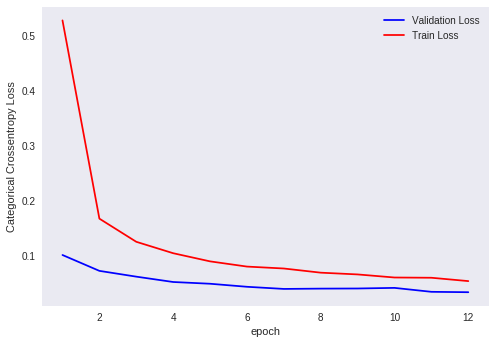

In [0]:
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,epochs+1))


vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

**5 layers CNN**

In [0]:
from keras.initializers import he_normal
model_5_layers = Sequential()

model_5_layers.add(Conv2D(32, kernel_size=(5, 5),activation='relu',input_shape=input_shape))
model_5_layers.add(Conv2D(32, (5, 5), activation='relu'))
model_5_layers.add(MaxPooling2D(pool_size=(2, 2)))
model_5_layers.add(Dropout(0.25))

model_5_layers.add(Conv2D(32, (3, 3), activation='relu'))
model_5_layers.add(Conv2D(32, (3, 3), activation='relu'))
model_5_layers.add(MaxPooling2D(pool_size=(2, 2)))
model_5_layers.add(Dropout(0.25))

model_5_layers.add(Flatten())

model_5_layers.add(Dense(256, activation='relu' , kernel_initializer=he_normal(seed=None)))
model_5_layers.add(Dropout(0.5))
model_5_layers.add(Dense(num_classes, activation='softmax'))

model_5_layers.compile(loss=keras.losses.categorical_crossentropy,
              optimizer='adam',
              metrics=['accuracy'])

history_5 = model_5_layers.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))

score = model_5_layers.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])



Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 199s 3ms/step - loss: 0.3567 - acc: 0.8837 - val_loss: 0.0563 - val_acc: 0.9817
Epoch 2/12
60000/60000 [==============================] - 197s 3ms/step - loss: 0.1010 - acc: 0.9696 - val_loss: 0.0353 - val_acc: 0.9880
Epoch 3/12
60000/60000 [==============================] - 198s 3ms/step - loss: 0.0698 - acc: 0.9787 - val_loss: 0.0348 - val_acc: 0.9885
Epoch 4/12
60000/60000 [==============================] - 197s 3ms/step - loss: 0.0585 - acc: 0.9826 - val_loss: 0.0250 - val_acc: 0.9917
Epoch 5/12
60000/60000 [==============================] - 196s 3ms/step - loss: 0.0509 - acc: 0.9845 - val_loss: 0.0260 - val_acc: 0.9906
Epoch 6/12
60000/60000 [==============================] - 197s 3ms/step - loss: 0.0448 - acc: 0.9870 - val_loss: 0.0224 - val_acc: 0.9923
Epoch 7/12
60000/60000 [==============================] - 196s 3ms/step - loss: 0.0414 - acc: 0.9876 - val_loss: 0.0195 - 

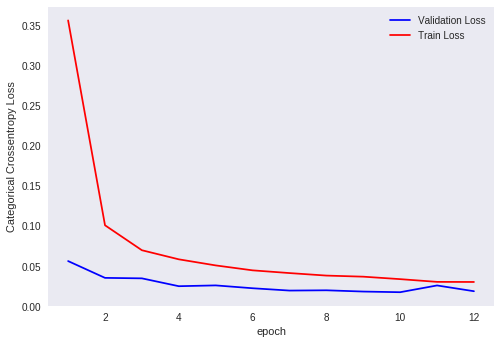

In [0]:
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,epochs+1))


vy = history_5.history['val_loss']
ty = history_5.history['loss']
plt_dynamic(x, vy, ty, ax)

**7 layers CNN**

In [0]:
from keras.layers.normalization import BatchNormalization

model_7_layers = Sequential()

model_7_layers.add(Conv2D(32, kernel_size=(2, 2),activation='relu',input_shape=input_shape))
model_7_layers.add(Conv2D(32, kernel_size=(2, 2),activation='relu',input_shape=input_shape))
model_7_layers.add(Conv2D(32, kernel_size=(2, 2),activation='relu',input_shape=input_shape))
model_7_layers.add(Dropout(0.3))

model_7_layers.add(Conv2D(64, (2, 2), activation='relu'))
model_7_layers.add(Conv2D(64, (2, 2), activation='relu'))
model_7_layers.add(Conv2D(64, (2, 2), activation='relu'))
model_7_layers.add(MaxPooling2D(pool_size=(2, 2)))
model_7_layers.add(Dropout(0.3))




model_7_layers.add(Flatten())

model_7_layers.add(Dense(256, activation='relu' , kernel_initializer=he_normal(seed=None)))
model_7_layers.add(BatchNormalization())
model_7_layers.add(Dropout(0.25))

model_7_layers.add(Dense(num_classes, activation='softmax'))

model_7_layers.compile(loss=keras.losses.categorical_crossentropy,
              optimizer='adam',
              metrics=['accuracy'])

history_7 = model_7_layers.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))

score = model_7_layers.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])


Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 430s 7ms/step - loss: 0.1441 - acc: 0.9551 - val_loss: 0.0480 - val_acc: 0.9849
Epoch 2/12
60000/60000 [==============================] - 429s 7ms/step - loss: 0.0513 - acc: 0.9847 - val_loss: 0.0354 - val_acc: 0.9880
Epoch 3/12
60000/60000 [==============================] - 426s 7ms/step - loss: 0.0378 - acc: 0.9882 - val_loss: 0.0309 - val_acc: 0.9901
Epoch 4/12
60000/60000 [==============================] - 426s 7ms/step - loss: 0.0315 - acc: 0.9901 - val_loss: 0.0355 - val_acc: 0.9883
Epoch 5/12
60000/60000 [==============================] - 426s 7ms/step - loss: 0.0240 - acc: 0.9922 - val_loss: 0.0281 - val_acc: 0.9911
Epoch 6/12
60000/60000 [==============================] - 423s 7ms/step - loss: 0.0219 - acc: 0.9933 - val_loss: 0.0404 - val_acc: 0.9860
Epoch 7/12
60000/60000 [==============================] - 421s 7ms/step - loss: 0.0194 - acc: 0.9939 - val_loss: 0.0257 - 

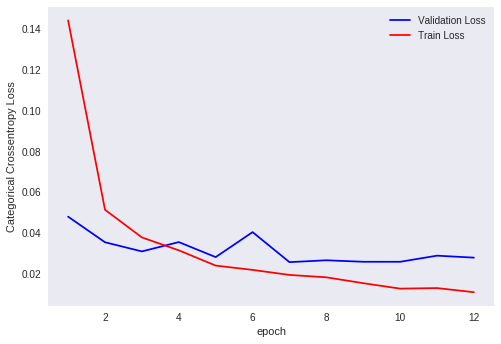

In [0]:
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,epochs+1))


vy = history_7.history['val_loss']
ty = history_7.history['loss']
plt_dynamic(x, vy, ty, ax)

In [0]:
from prettytable import PrettyTable
x = PrettyTable()
x.field_names = ["No. of layers", "Test Loss", "Test Accuracy"]
x.add_row(['2' , '0.034','0.989'])
x.add_row(['3' , '0.018','0.994'])
x.add_row(['5' , '0.027','0.992'])
print(x)

+---------------+-----------+---------------+
| No. of layers | Test Loss | Test Accuracy |
+---------------+-----------+---------------+
|       2       |   0.034   |     0.989     |
|       3       |   0.018   |     0.994     |
|       5       |   0.027   |     0.992     |
+---------------+-----------+---------------+


**CONCLUSION**


1.  Loss & Accuracy  performance of CNN model on test data is better than MLP model
2.  As the number of epocs increases loss decreases.

